In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [2]:
path = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path)

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [4]:
#PART 1

In [5]:
#Crosstab Analysis:

In [6]:
#Create a crosstab between the product category and the isBestSeller status.

In [7]:
cross_tab = pd.crosstab(df["category"], df["isBestSeller"])

In [8]:
cross_tab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
#Are there categories where being a best-seller is more prevalent?
#Hint: one option is to calculate the proportion of best-sellers for each category 
#and then sort the categories based on this proportion in descending order.

In [10]:
cross_tab["proportion_bestseller"] = cross_tab[True] / (cross_tab[True] + cross_tab[False])

In [11]:
cross_tab_sorted = cross_tab.sort_values(by = "proportion_bestseller", ascending = False)

In [12]:
cross_tab_sorted.head(10)

isBestSeller,False,True,proportion_bestseller
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [13]:
#There are several categories where being best seller is prevalent, like we can see in the previous chart.
#The category where there are most bestsellers is Grocery, followed by Smart Home Security & Lighting and Health & Personal Care.

In [14]:
#Statistical Tests:

In [15]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [16]:
cross_tab.drop(columns = "proportion_bestseller", inplace = True)

In [17]:
cross_tab.dtypes

isBestSeller
False    int64
True     int64
dtype: object

In [18]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cross_tab)

In [19]:
chi2_p_value

0.0

In [20]:
# p-value= 0 which is < 0.05, this suggests that there is a significant association between the category and best sellers

In [21]:
#Compute Cramér's V to understand the strength of association between best-seller status and category.

In [22]:
association(cross_tab, method = "cramer")

0.1222829439760564

In [23]:
#We can see there is not a strong association between the two categories.

In [24]:
#Visualizations:

In [25]:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [26]:
cross_tab_1 = pd.crosstab(df["isBestSeller"], df["category"]).head(3)

In [27]:
cross_tab_1

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


<Axes: xlabel='category', ylabel='isBestSeller'>

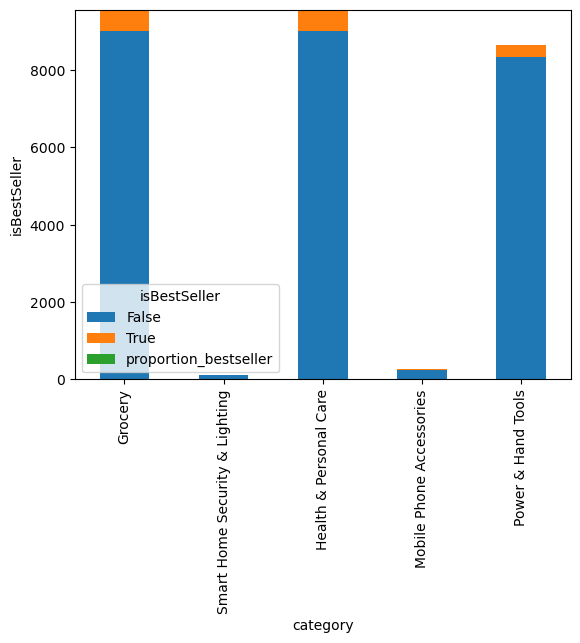

In [28]:
cross_tab_sorted[:5].plot(kind = "bar", xlabel = "category", ylabel = "isBestSeller", stacked = True, legend = "best")

In [29]:
#PART 2
#Objective: Investigate how different product categories influence product prices.

In [30]:
#Preliminary Step: Remove outliers in product prices.

In [31]:
#For this purpose, we can use the IQR (Interquartile Range) method. 
#Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times 
#the IQR will be considered outliers and removed from the dataset. 
#The next steps will be done with the dataframe without outliers.

In [32]:
#Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis 
#for a hint on how to do this.

In [33]:
def tukeys_test_outliers(my_data, method = "show"):
    data = my_data.copy()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if method == "show":   
        return outliers
    elif method == "replace":
        median = data.median()
        data[outliers.index] = median
        return data
    elif method == "delete":
        index_drop = outliers.index
        data_no_outliers = data.drop(index_drop)
        return data_no_outliers

In [34]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [35]:
no_outlier_df = tukeys_test_outliers(df["price"], method ="delete")

In [36]:
df["price"]

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2443651, dtype: float64

In [37]:
no_outlier_df

0          21.99
1          23.99
2          21.99
3          31.99
4          17.99
           ...  
2443646    22.34
2443647    97.99
2443648    52.99
2443649    79.99
2443650    53.99
Name: price, Length: 2115963, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

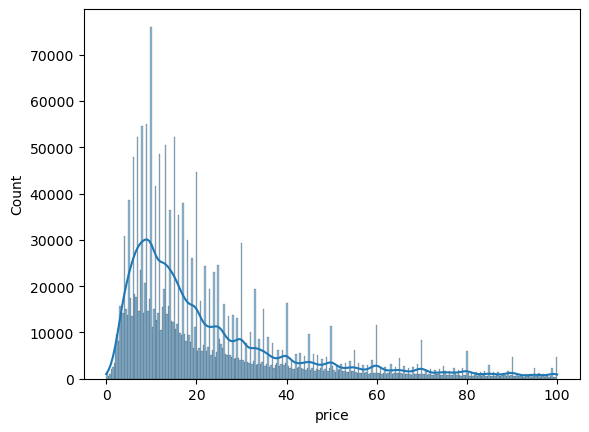

In [38]:
sns.histplot(no_outlier_df, kde = True)

In [39]:
#Violin Plots:

In [40]:
#Use a violin plot to visualize the distribution of price across different product categories. 
#Filter out the top 20 categories based on count for better visualization.

In [41]:
df["category"].value_counts()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [42]:
top_categories = df["category"].value_counts().nlargest(20).index
filtered_df = df[~df["category"].isin(top_categories)]


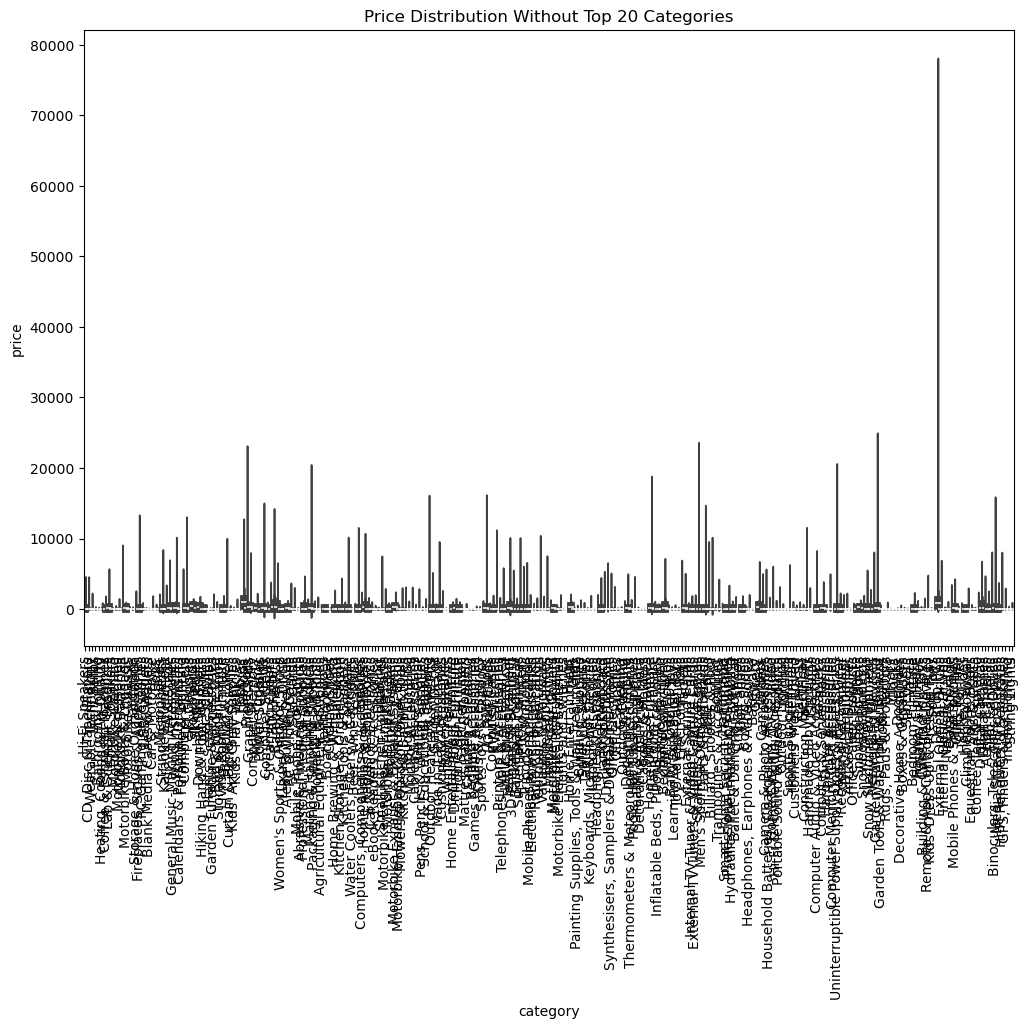

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = filtered_df, x = "category", y = "price")
plt.xticks(rotation=90)
plt.title("Price Distribution Without Top 20 Categories")
plt.show()

In [44]:
#The violin plot is ot readable. There are too many categories even though I filtered out the top 20.

In [45]:
#Which product category tends to have the highest median price? Don't filter here by top categories.

In [46]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [47]:
grouped_df = df.groupby(["category"]).agg({"price": "median"}).sort_values("price", ascending=False)

In [48]:
grouped_df

,price
category,
Laptops,1042.725
Desktop PCs,810.400
Snowboards,366.725
Home Audio Record Players,326.080
3D Printers,319.000
...,...
Adapters,7.050
Make-up,7.000
Signs & Plaques,6.990


In [49]:
# Laptops tend to have the highest median price (value od 1042.73)

In [50]:
#Bar Charts:

In [51]:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

In [52]:
top_10_categories = df["category"].value_counts().nlargest(10).index


In [53]:
top_10_df = df[df["category"].isin(top_10_categories)]


In [54]:
avg_price_per_category = top_10_df.groupby("category").agg({"price":"mean"}).sort_values("price", ascending = False).reset_index()

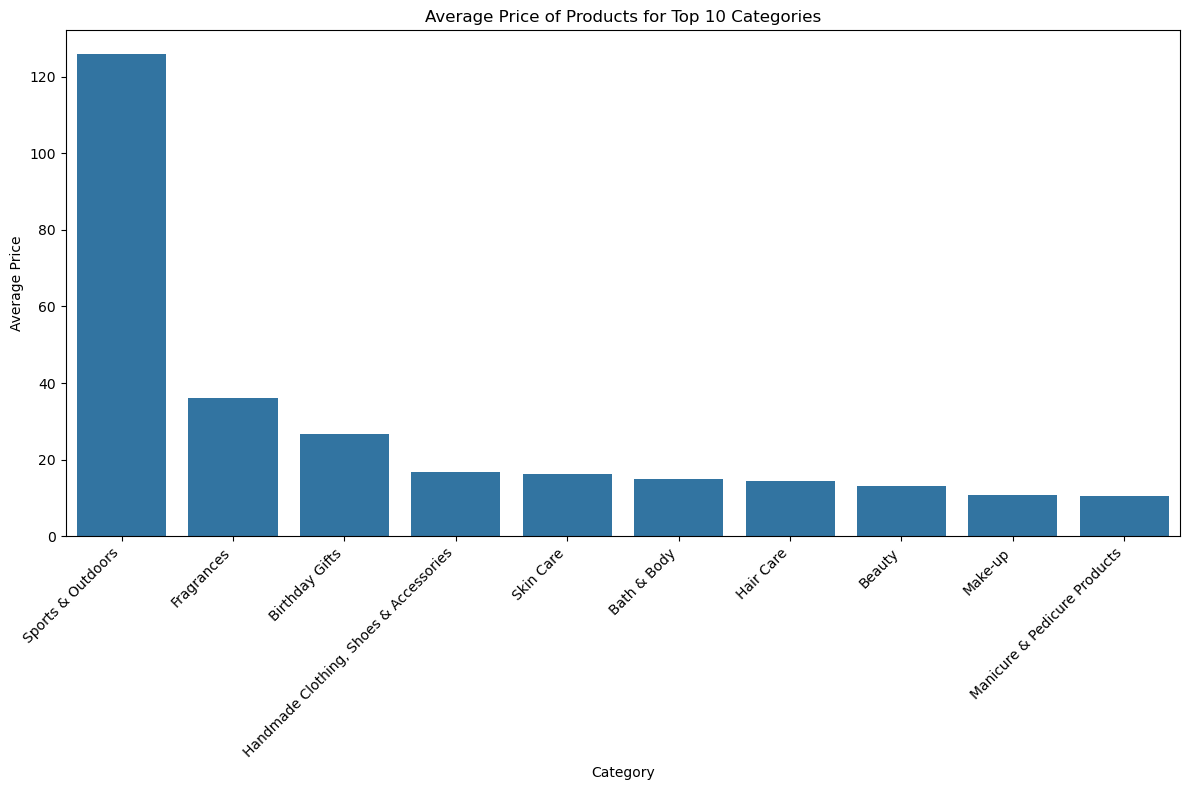

In [55]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "category", y = "price", data=avg_price_per_category)
plt.xticks(rotation =45, ha ='right')
plt.title("Average Price of Products for Top 10 Categories")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

In [56]:
#Which product category commands the highest average price? Don't filter here by top categories.

In [57]:
avg_price_per_category = df.groupby("category").agg({"price":"mean"}).sort_values("price", ascending = False).reset_index()

In [58]:
avg_price_per_category

,category,price
0,Laptops,1087.987827
1,3D Printers,1018.036129
2,Desktop PCs,926.816064
3,Home Office Furniture,622.135898
4,Test & Measurement,559.382973
...,...,...
291,Bedding Accessories,8.835220
292,Adapters,8.750197
293,Signs & Plaques,8.275136
294,Arts & Crafts,8.182523


In [59]:
#The highest avg price category is "Laptops", with an average of 1087.99

In [60]:
#Box Plots:

In [61]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.

In [62]:
cat_rating = df['category'].value_counts().nlargest(10).index
filtered_rating_df = df[~df['category'].isin(top_categories)]
grouped_filtered = filtered_rating_df.groupby(["category"]).agg({"stars": "count"})

In [63]:
grouped_filtered

,stars
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wearable Technology,8906
Wind Instruments,250
Window Treatments,239


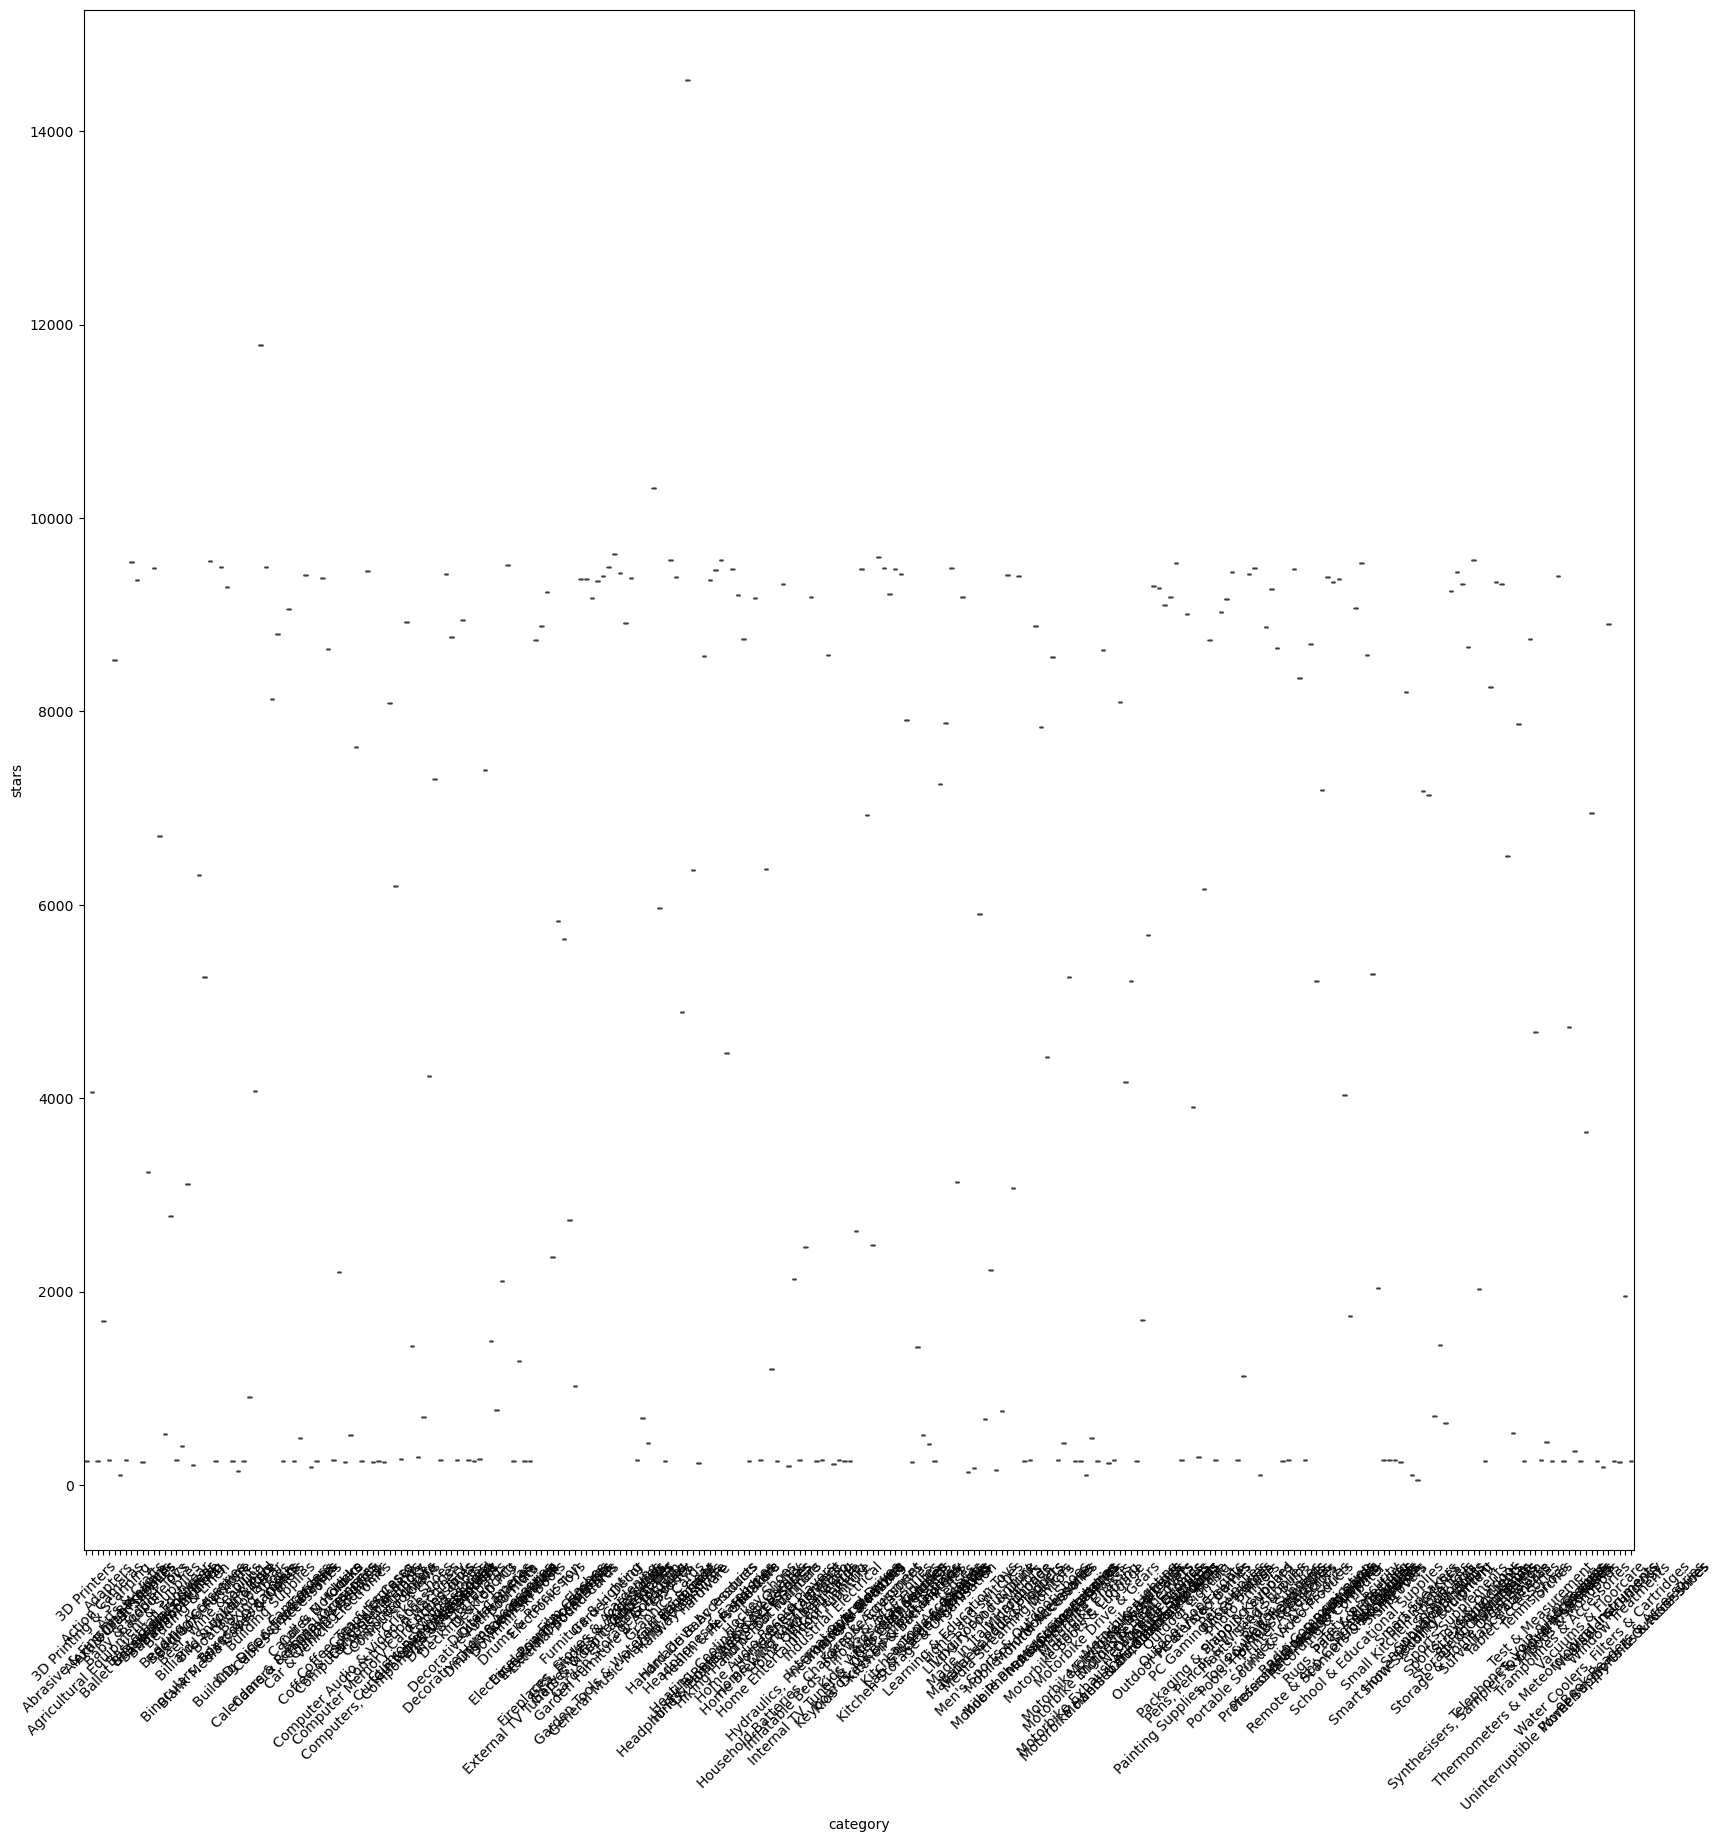

In [64]:
plt.figure(figsize = (20, 20))
sns.boxplot(data = grouped_filtered, x = "category", y = "stars")
plt.xticks(rotation = 45)
plt.show()

In [65]:
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [66]:
highest_median_rat = df.groupby(["category"]).agg({"stars": "median"}).sort_values("stars", ascending = False)

In [67]:
highest_median_rat

,stars
category,
Computer Memory,4.7
Hobbies,4.6
"Beer, Wine & Spirits",4.6
Laptop Accessories,4.6
Kids' Play Figures,4.6
...,...
KVM Switches,0.0
Karaoke Equipment,0.0
Lab & Scientific Products,0.0


In [68]:
#The category computer memory tends to hace highest median ratings from customers (value of 4.7).

In [69]:
#PART 3

In [70]:
#Objective: Analyze how product ratings (stars) correlate with product prices.

In [71]:
#Correlation Coefficients:

In [72]:
#Calculate the correlation coefficient between price and stars.

In [73]:
# Calculating the Pearson correlation coefficient 
correlation = df['price'].corr(df['stars'])
correlation

-0.12490673262159059

In [74]:
# Calculating the Spearman rank correlation
correlation_spear = df['price'].corr(df['stars'], method='spearman')
correlation_spear

-0.13316425462401277

In [75]:
#Is there a significant correlation between product price and its rating?

In [76]:
#There is a weak negative correlation between the variables, but it's not significant.

In [77]:
#Visualizations

In [78]:
#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

<Axes: xlabel='stars', ylabel='price'>

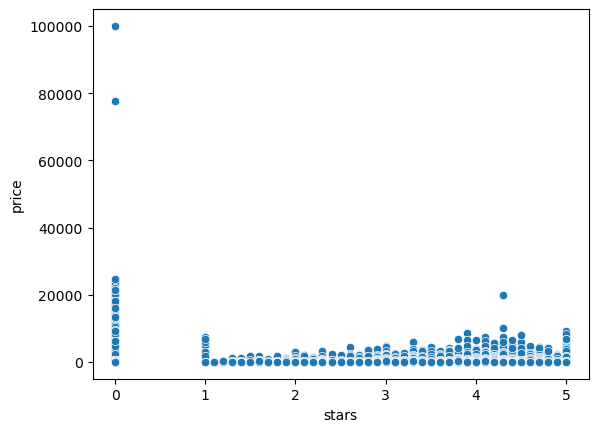

In [79]:
sns.scatterplot(data = df, x = "stars", y = "price" )

In [80]:
#First of all we can see outliers with 0 stars (very high prices for 0 stars), this is because 0 stars is default when the product has no rationg.
#It's also visible a pattern of growing prices as the number of stars grow.
#most ratings ate between approximately 3.8 to 4.5 stars.

In [81]:
#Use a correlation heatmap to visualize correlations between all numerical variables.

In [82]:
df_numerical = df.select_dtypes("number") 

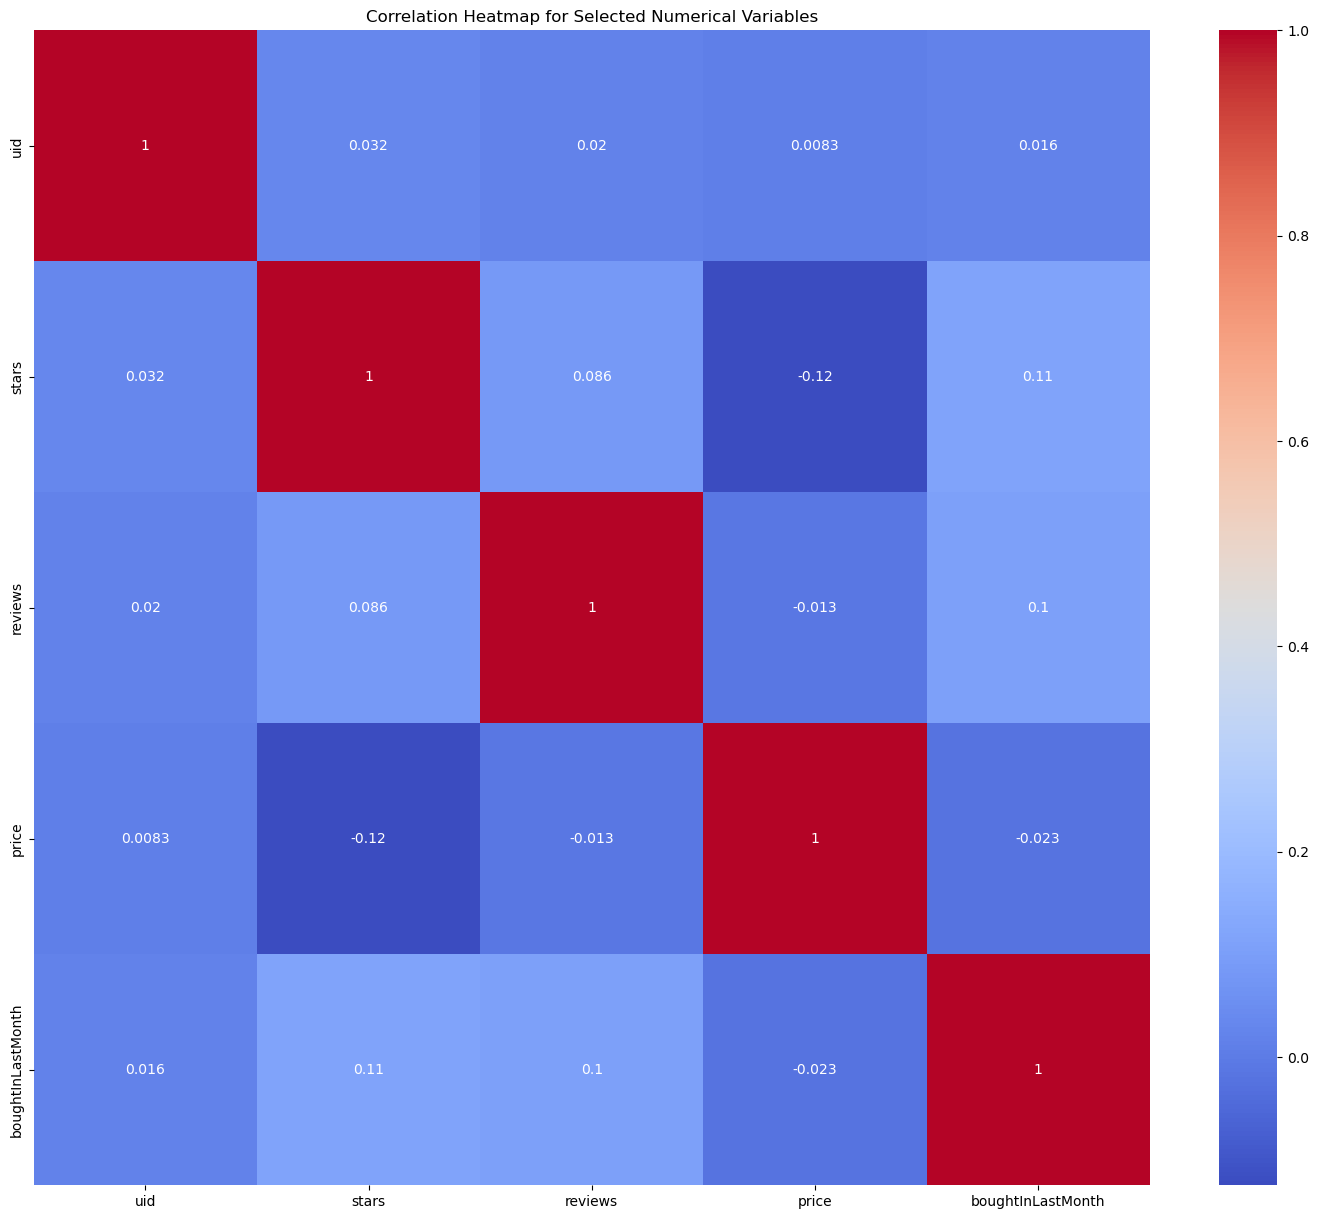

In [83]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [84]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [85]:
#Examine if product prices typically follow a normal distribution using a QQ plot.

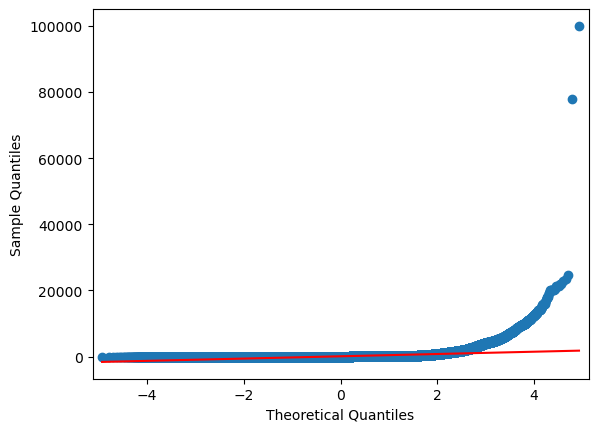

In [86]:
import statsmodels.api as sm

sm.qqplot(df["price"], line = "s");

In [87]:
#As we can see in the qq plot, prices don't follow a normal distribution.